# THIS RESULTS ARE BAD, should be using all spindles and not N2 only
we keep it because results will likely be consistent with it

fistly define the UUID of the experiment to use

In [1]:
experimentId="a74605bf-c0bb-40f7-9b50-444123efb629"

-------------------------------------------------------

In this notebook we have some overall properties of the models trained and how they change with the labeling criterium

In [1]:
#external libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import plotly
import plotly.subplots as sb
import plotly.express as px
import plotly.graph_objects as go
import dotenv
import pandas as pd
import scipy.fft as fft
import scipy.signal as sg
import scipy.io as sio
import pickle as pkl
import xgboost as xgb
import time
import sklearn.metrics as skm

#project library
from spinco import *

#environment variables
dotenv.load_dotenv('lab.env')

#project variables
datapath=os.environ['DATAPATH']
cognipath=datapath+"\\COGNITION"
dreamspath=datapath+"\\DREAMS"
masspath=datapath+"\\MASS"


## load mass

In [2]:
samplerate=200  #Should rethink this

In [3]:
annotations, signalsMetadata = loadMASSSpindles(masspath,forceSamplerate=samplerate,onlySpindlesFilteredN2=True)

In [5]:
annotations.head()

,type,expert,subjectId,labelerId,startTime,duration,samplerate,stopTime,startInd,stopInd
0,spindle,E1,0001,0001,888.327805,0.640579,200,888.968384,177666,177794
1,spindle,E1,0001,0001,905.758061,0.578094,200,906.336155,181152,181267
2,spindle,E1,0001,0001,917.731574,0.847603,200,918.579177,183546,183716
3,spindle,E1,0001,0001,922.078189,0.878845,200,922.957034,184416,184591
4,spindle,E1,0001,0001,939.055445,0.757767,200,939.813212,187811,187963


In [6]:
signalsMetadata.head()

,subjectId,file,channel,duration,samplerate,isOriginalSamplerate,database
0,0001,MASS_0001.pkl,C3-CLE,28956.0,200,False,MASS
1,0002,MASS_0002.pkl,C3-CLE,35016.0,200,False,MASS
2,0003,MASS_0003.pkl,C3-CLE,36760.0,200,False,MASS
3,0004,MASS_0004.pkl,C3-CLE,28004.0,200,False,MASS
4,0005,MASS_0005.pkl,C3-CLE,31244.0,200,False,MASS


## Load experiment results

In [7]:
experimentModels, featureSelection = loadExperiment(experimentId,datapath)

In [8]:
experimentModels

,criteriumId,criteriumName,labelerIdList,train,val,test,modelId,spindleTimeRate
0,0001,E1,[0001],"[0001, 0003, 0005, 0007, 0010, 0014, 0017, 0019]","[0011, 0018, 0009]","[0002, 0006, 0012, 0013]",afd523c8-e3bf-44e0-a0c7-85a7b0d747e4,0.016462
1,0001,E1,[0001],"[0001, 0007, 0009, 0010, 0014, 0017, 0018, 0019]","[0011, 0003, 0005]","[0002, 0006, 0012, 0013]",d90313d0-46a5-4957-b4bd-1c2e66388a31,0.023280
2,0001,E1,[0001],"[0003, 0007, 0010, 0011, 0014, 0017, 0018, 0019]","[0009, 0005, 0001]","[0002, 0006, 0012, 0013]",825f07e0-9a06-44aa-bb72-93cdd7d64ca2,0.018776
3,0001,E1,[0001],"[0003, 0005, 0007, 0009, 0010, 0011, 0017, 0019]","[0001, 0018, 0014]","[0002, 0006, 0012, 0013]",0b4afad9-a6fb-43ae-8f49-a5d65994e109,0.016077
4,0001,E1,[0001],"[0001, 0003, 0005, 0007, 0010, 0014, 0018, 0019]","[0009, 0011, 0017]","[0002, 0006, 0012, 0013]",bcaeb868-00a0-4038-bc73-fb5d86ea09ee,0.018950
5,0001,E1,[0001],"[0001, 0003, 0007, 0009, 0014, 0017, 0018, 0019]","[0011, 0010, 0005]","[0002, 0006, 0012, 0013]",00a66953-1236-49a2-bbdc-78c361fa15f0,0.019888
6,0001,E1,[0001],"[0001, 0005, 0007, 0010, 0011, 0014, 0017, 0019]","[0018, 0003, 0009]","[0002, 0006, 0012, 0013]",adcf962a-53df-4cb8-ae1f-7a94e2ad3e0c,0.019369
7,0001,E1,[0001],"[0001, 0003, 0005, 0007, 0009, 0014, 0018, 0019]","[0010, 0011, 0017]","[0002, 0006, 0012, 0013]",21c95c6e-be0b-49bb-a43b-807238a1b12c,0.019076
8,0001,E1,[0001],"[0003, 0005, 0007, 0009, 0011, 0014, 0017, 0018]","[0001, 0019, 0010]","[0002, 0006, 0012, 0013]",216f16f3-c2d8-4735-bf51-0daed207c25e,0.018514
9,0001,E1,[0001],"[0001, 0003, 0005, 0007, 0009, 0010, 0011, 0018]","[0017, 0019, 0014]","[0002, 0006, 0012, 0013]",09cbec08-c8af-49fb-aabd-4702bef80265,0.020993


In [9]:
#we show the difference in class inbalance for the annotation criteria considered
experimentModels[['criteriumName','spindleTimeRate']].groupby('criteriumName').describe()

spindleTimeRate                                          \
                        count      mean       std       min       25%   
criteriumName                                                           
E1                       10.0  0.019138  0.002063  0.016077  0.018579   
E2                       10.0  0.059377  0.004969  0.054294  0.056372   
union                    10.0  0.060948  0.005032  0.055834  0.058060   

                                             
                    50%       75%       max  
criteriumName                                
E1             0.019013  0.019758  0.023280  
E2             0.057708  0.060940  0.069221  
union          0.059096  0.062695  0.071169

In [10]:
featureSelection

,characteristic,bandName,window
21,hjortActivity,sigma,0.5
66,petrosian,broadband,0.5
22,hjortActivity,theta,0.5
79,relativePower,beta1,0.5
29,hjortComplexity,sigma,0.5


## Optimal hyperparameter estimation with E2 criterium
we test the optimal points for the prediction threshold and number of boost iterations in the different validation groups

In [11]:
experimentModels=experimentModels[experimentModels.criteriumName=='E2'].reset_index(drop=True)
experimentModels

,criteriumId,criteriumName,labelerIdList,train,val,test,modelId,spindleTimeRate
0,0002,E2,[0002],"[0001, 0003, 0005, 0007, 0010, 0014, 0017, 0019]","[0011, 0018, 0009]","[0002, 0006, 0012, 0013]",1623c979-486c-4f45-ba54-dbbac3770588,0.057678
1,0002,E2,[0002],"[0001, 0007, 0009, 0010, 0014, 0017, 0018, 0019]","[0011, 0003, 0005]","[0002, 0006, 0012, 0013]",f8abeec1-7d46-4573-8a01-7827b8584472,0.069221
2,0002,E2,[0002],"[0003, 0007, 0010, 0011, 0014, 0017, 0018, 0019]","[0009, 0005, 0001]","[0002, 0006, 0012, 0013]",c556cd55-5f8b-420c-b6b2-0ca323bee5df,0.057084
3,0002,E2,[0002],"[0003, 0005, 0007, 0009, 0010, 0011, 0017, 0019]","[0001, 0018, 0014]","[0002, 0006, 0012, 0013]",b9ca9323-c013-423a-8b12-a893e0a8be97,0.054695
4,0002,E2,[0002],"[0001, 0003, 0005, 0007, 0010, 0014, 0018, 0019]","[0009, 0011, 0017]","[0002, 0006, 0012, 0013]",e31d0f92-1914-4bb5-9156-f9101fe1307c,0.057739
5,0002,E2,[0002],"[0001, 0003, 0007, 0009, 0014, 0017, 0018, 0019]","[0011, 0010, 0005]","[0002, 0006, 0012, 0013]",6fd86953-d3aa-4c9c-8069-b22b951dce3f,0.058764
6,0002,E2,[0002],"[0001, 0005, 0007, 0010, 0011, 0014, 0017, 0019]","[0018, 0003, 0009]","[0002, 0006, 0012, 0013]",87913851-d47b-4963-b2fa-1c65d7aec5a1,0.066493
7,0002,E2,[0002],"[0001, 0003, 0005, 0007, 0009, 0014, 0018, 0019]","[0010, 0011, 0017]","[0002, 0006, 0012, 0013]",0f0da0b8-d512-47b2-808a-c92b1d073468,0.056135
8,0002,E2,[0002],"[0003, 0005, 0007, 0009, 0011, 0014, 0017, 0018]","[0001, 0019, 0010]","[0002, 0006, 0012, 0013]",006d0918-7072-4365-953e-4b399728048d,0.054294
9,0002,E2,[0002],"[0001, 0003, 0005, 0007, 0009, 0010, 0011, 0018]","[0017, 0019, 0014]","[0002, 0006, 0012, 0013]",ca54dd96-c49f-4680-a78d-2aabf3059e5c,0.061666


In [12]:
auxThres=pd.DataFrame({
    'hyperThres':[0.25,0.5,0.75]
})
auxTrees=pd.DataFrame({
    'hyperTrees':[15,20,25]
})

In [13]:
hyperParams=pd.merge(auxThres,auxTrees,how='cross')

In [14]:
hyperParams

,hyperThres,hyperTrees
0,0.25,15
1,0.25,20
2,0.25,25
3,0.50,15
4,0.50,20
5,0.50,25
6,0.75,15
7,0.75,20
8,0.75,25


In [15]:
hyperClose=0.25
hyperDuration=0.3
hyperExperimentModels=[]

In [16]:
hyperMeanF1=[]
hyperStdF1=[]

for ind_hyper,row_hyper in hyperParams.iterrows():
    thisExperimentModels=experimentModels.copy()
    hyperThres=row_hyper.hyperThres
    hyperTrees=int(row_hyper.hyperTrees)
    
    meanF1=[]
    meanPrecision=[]
    meanRecall=[]
    rawMeanF1=[]
    rawMeanPrecision=[]
    rawMeanRecall=[]

    stdF1=[]
    stdPrecision=[]
    stdRecall=[]
    rawStdF1=[]
    rawStdPrecision=[]
    rawStdRecall=[]

    for ind,row in thisExperimentModels.iterrows():
        #load model
        model=loadBooster(row.modelId,experimentId,datapath)
        #initialise lists
        rawF1s=[]
        rawPrecisions=[]
        rawRecalls=[]
        #rawFprs=[]
        f1s=[]
        precisions=[]
        recalls=[]
        #fprs=[]

        #iterate validation subjects
        for valSubjectId in row.val:
            #Define annotations criterium
            usedAnnotations=annotations[annotations.labelerId.isin(row.labelerIdList)].reset_index(drop=True)
            #Load features and labels
            valFeatures=loadFeatureMatrix([valSubjectId],featureSelection,signalsMetadata,samplerate,datapath)
            valLabels=loadLabelsVector([valSubjectId],usedAnnotations,signalsMetadata,samplerate)
            #Predict
            valDMatrix=xgb.DMatrix(data=valFeatures)
            probabilities=model.predict(valDMatrix,iteration_range=(0,hyperTrees))
            rawLabels=probabilities>=hyperThres
            #Raw Metrics
            rawTp=np.sum(rawLabels*valLabels)
            rawFp=np.sum(rawLabels*(1-valLabels))
            rawTn=np.sum((1-rawLabels)*(1-valLabels))
            rawFn=np.sum((1-rawLabels)*valLabels)
            rawF1=2*rawTp/(2*rawTp+rawFp+rawFn)
            rawPrecision=rawTp/(rawTp+rawFp) 
            rawRecall=rawTp/(rawTp+rawFn)
            #rawFpr=rawFp/(rawFp+rawFn)
            #Raw appends
            rawF1s.append(rawF1)
            rawPrecisions.append(rawPrecision)
            rawRecalls.append(rawRecall)
            #rawFprs.append(rawFpr)
            #Process
            processedLabels=labelingProcess(rawLabels,hyperClose,hyperDuration,samplerate)
            #Processed metrics
            tp=np.sum(processedLabels*valLabels)
            fp=np.sum(processedLabels*(1-valLabels))
            tn=np.sum((1-processedLabels)*(1-valLabels))
            fn=np.sum((1-processedLabels)*valLabels)
            f1=2*tp/(2*tp+fp+fn)
            precision=tp/(tp+fp)
            recall=tp/(tp+fn)
            #fpr=fp/(fp+tn)
            #Processed appends
            f1s.append(f1)
            precisions.append(precision)
            recalls.append(recall)
            #fprs.append(fpr)

        #statistics of the metrics over the subjects of the validation set
        meanF1.append(np.mean(f1s))
        meanPrecision.append(np.mean(precisions))
        meanRecall.append(np.mean(recalls))
        rawMeanF1.append(np.mean(rawF1s))
        rawMeanPrecision.append(np.mean(rawPrecisions))
        rawMeanRecall.append(np.mean(rawRecalls))

        stdF1.append(np.std(f1s))
        stdPrecision.append(np.std(precisions))
        stdRecall.append(np.std(recalls))
        rawStdF1.append(np.std(rawF1s))
        rawStdPrecision.append(np.std(rawPrecisions))
        rawStdRecall.append(np.std(rawRecalls))

    thisExperimentModels['meanF1']=meanF1
    thisExperimentModels['meanPrecision']=meanPrecision
    thisExperimentModels['meanRecall']=meanRecall
    thisExperimentModels['rawMeanF1']=rawMeanF1
    thisExperimentModels['rawMeanPrecision']=rawMeanPrecision
    thisExperimentModels['rawMeanRecall']=rawMeanRecall

    thisExperimentModels['stdF1']=stdF1
    thisExperimentModels['stdPrecision']=stdPrecision
    thisExperimentModels['stdRecall']=stdRecall
    thisExperimentModels['rawStdF1']=rawStdF1
    thisExperimentModels['rawStdPrecision']=rawStdPrecision
    thisExperimentModels['rawStdRecall']=rawStdRecall

    hyperExperimentModels.append(thisExperimentModels)
    hyperMeanF1.append(np.mean(thisExperimentModels['meanF1']))
    hyperStdF1.append(np.std(thisExperimentModels['meanF1']))

In [17]:
hyperParams['meanMeanF1']=hyperMeanF1
hyperParams['stdMeanF1']=hyperStdF1

In [20]:
hyperParams

,hyperThres,hyperTrees,meanMeanF1,stdMeanF1
0,0.25,15,0.619015,0.036923
1,0.25,20,0.619027,0.036975
2,0.25,25,0.618841,0.036790
3,0.50,15,0.577114,0.053877
4,0.50,20,0.578692,0.053291
5,0.50,25,0.578905,0.052913
6,0.75,15,0.348829,0.081867
7,0.75,20,0.358371,0.080160
8,0.75,25,0.362781,0.078960


In [24]:
px.scatter(hyperParams,x='hyperTrees',y='meanMeanF1',error_y='stdMeanF1',facet_col='hyperThres')

In [25]:
hyperExperimentModels_first=hyperExperimentModels.copy()

In [36]:
fig=px.scatter(hyperExperimentModels_first[0],x='rawMeanF1',y='meanF1', marginal_y="histogram",trendline='ols',hover_name='modelId')
fig.add_trace(
    go.Scatter(x=hyperExperimentModels_first[0]['rawMeanF1'], y=hyperExperimentModels_first[0]['rawMeanF1'], name="identity", mode='lines',fill="toself")
)
fig.show()

In [30]:
np.mean(hyperExperimentModels_first[0]['meanF1'])

0.619015330403489

In [31]:
np.mean(hyperExperimentModels_first[0]['rawMeanF1'])

0.6143231212176797

### second iteration

In [38]:
auxThres=pd.DataFrame({
    'hyperThres':[0.05,0.15,0.25,0.35,0.45]
})
auxTrees=pd.DataFrame({
    'hyperTrees':[5,10,15,20,25]
})

hyperParams=pd.merge(auxThres,auxTrees,how='cross')
hyperParams

,hyperThres,hyperTrees
0,0.05,5
1,0.05,10
2,0.05,15
3,0.05,20
4,0.05,25
5,0.15,5
6,0.15,10
7,0.15,15
8,0.15,20
9,0.15,25


In [39]:
hyperClose=0.25
hyperDuration=0.3
hyperExperimentModels=[]
hyperMeanF1=[]
hyperStdF1=[]

for ind_hyper,row_hyper in hyperParams.iterrows():
    thisExperimentModels=experimentModels.copy()
    hyperThres=row_hyper.hyperThres
    hyperTrees=int(row_hyper.hyperTrees)
    
    meanF1=[]
    meanPrecision=[]
    meanRecall=[]
    rawMeanF1=[]
    rawMeanPrecision=[]
    rawMeanRecall=[]

    stdF1=[]
    stdPrecision=[]
    stdRecall=[]
    rawStdF1=[]
    rawStdPrecision=[]
    rawStdRecall=[]

    for ind,row in thisExperimentModels.iterrows():
        #load model
        model=loadBooster(row.modelId,experimentId,datapath)
        #initialise lists
        rawF1s=[]
        rawPrecisions=[]
        rawRecalls=[]
        #rawFprs=[]
        f1s=[]
        precisions=[]
        recalls=[]
        #fprs=[]

        #iterate validation subjects
        for valSubjectId in row.val:
            #Define annotations criterium
            usedAnnotations=annotations[annotations.labelerId.isin(row.labelerIdList)].reset_index(drop=True)
            #Load features and labels
            valFeatures=loadFeatureMatrix([valSubjectId],featureSelection,signalsMetadata,samplerate,datapath)
            valLabels=loadLabelsVector([valSubjectId],usedAnnotations,signalsMetadata,samplerate)
            #Predict
            valDMatrix=xgb.DMatrix(data=valFeatures)
            probabilities=model.predict(valDMatrix,iteration_range=(0,hyperTrees))
            rawLabels=probabilities>=hyperThres
            #Raw Metrics
            rawTp=np.sum(rawLabels*valLabels)
            rawFp=np.sum(rawLabels*(1-valLabels))
            rawTn=np.sum((1-rawLabels)*(1-valLabels))
            rawFn=np.sum((1-rawLabels)*valLabels)
            rawF1=2*rawTp/(2*rawTp+rawFp+rawFn)
            rawPrecision=rawTp/(rawTp+rawFp) 
            rawRecall=rawTp/(rawTp+rawFn)
            #rawFpr=rawFp/(rawFp+rawFn)
            #Raw appends
            rawF1s.append(rawF1)
            rawPrecisions.append(rawPrecision)
            rawRecalls.append(rawRecall)
            #rawFprs.append(rawFpr)
            #Process
            processedLabels=labelingProcess(rawLabels,hyperClose,hyperDuration,samplerate)
            #Processed metrics
            tp=np.sum(processedLabels*valLabels)
            fp=np.sum(processedLabels*(1-valLabels))
            tn=np.sum((1-processedLabels)*(1-valLabels))
            fn=np.sum((1-processedLabels)*valLabels)
            f1=2*tp/(2*tp+fp+fn)
            precision=tp/(tp+fp)
            recall=tp/(tp+fn)
            #fpr=fp/(fp+tn)
            #Processed appends
            f1s.append(f1)
            precisions.append(precision)
            recalls.append(recall)
            #fprs.append(fpr)

        #statistics of the metrics over the subjects of the validation set
        meanF1.append(np.mean(f1s))
        meanPrecision.append(np.mean(precisions))
        meanRecall.append(np.mean(recalls))
        rawMeanF1.append(np.mean(rawF1s))
        rawMeanPrecision.append(np.mean(rawPrecisions))
        rawMeanRecall.append(np.mean(rawRecalls))

        stdF1.append(np.std(f1s))
        stdPrecision.append(np.std(precisions))
        stdRecall.append(np.std(recalls))
        rawStdF1.append(np.std(rawF1s))
        rawStdPrecision.append(np.std(rawPrecisions))
        rawStdRecall.append(np.std(rawRecalls))

    thisExperimentModels['meanF1']=meanF1
    thisExperimentModels['meanPrecision']=meanPrecision
    thisExperimentModels['meanRecall']=meanRecall
    thisExperimentModels['rawMeanF1']=rawMeanF1
    thisExperimentModels['rawMeanPrecision']=rawMeanPrecision
    thisExperimentModels['rawMeanRecall']=rawMeanRecall

    thisExperimentModels['stdF1']=stdF1
    thisExperimentModels['stdPrecision']=stdPrecision
    thisExperimentModels['stdRecall']=stdRecall
    thisExperimentModels['rawStdF1']=rawStdF1
    thisExperimentModels['rawStdPrecision']=rawStdPrecision
    thisExperimentModels['rawStdRecall']=rawStdRecall

    hyperExperimentModels.append(thisExperimentModels)
    hyperMeanF1.append(np.mean(thisExperimentModels['meanF1']))
    hyperStdF1.append(np.std(thisExperimentModels['meanF1']))

In [40]:
hyperParams['meanMeanF1']=hyperMeanF1
hyperParams['stdMeanF1']=hyperStdF1

In [41]:
px.scatter(hyperParams,x='hyperTrees',y='meanMeanF1',error_y='stdMeanF1',facet_col='hyperThres')

In [42]:
px.scatter(hyperParams,x='hyperThres',y='meanMeanF1',error_y='stdMeanF1',facet_col='hyperTrees')

In [50]:
optimalInd=hyperParams[hyperParams.meanMeanF1==np.max(hyperParams.meanMeanF1)].index[0]
hyperParams.iloc[optimalInd]

hyperThres     0.350000
hyperTrees    25.000000
meanMeanF1     0.621482
stdMeanF1      0.040609
Name: 19, dtype: float64

In [49]:
optimalInd_2=hyperParams[hyperParams.stdMeanF1==np.min(hyperParams.stdMeanF1)].index[0]
hyperParams.iloc[optimalInd_2]

hyperThres     0.250000
hyperTrees    25.000000
meanMeanF1     0.618841
stdMeanF1      0.036790
Name: 14, dtype: float64

In [48]:
hyperParams[hyperParams.hyperTrees==25]

,hyperThres,hyperTrees,meanMeanF1,stdMeanF1
4,0.05,25,0.458818,0.077124
9,0.15,25,0.576389,0.048649
14,0.25,25,0.618841,0.036790
19,0.35,25,0.621482,0.040609
24,0.45,25,0.598595,0.048680


In [53]:
fig=px.scatter(hyperExperimentModels[optimalInd],x='rawMeanF1',y='meanF1', marginal_y="histogram",trendline='ols',hover_name='modelId')
fig.add_trace(
    go.Scatter(x=hyperExperimentModels[optimalInd]['rawMeanF1'], y=hyperExperimentModels[optimalInd]['rawMeanF1'], name="identity", mode='lines',fill="toself")
)
fig.show()

In [18]:
4/0

ZeroDivisionError: division by zero

In [ ]:
meanF1=[]
meanPrecision=[]
meanRecall=[]
rawMeanF1=[]
rawMeanPrecision=[]
rawMeanRecall=[]

stdF1=[]
stdPrecision=[]
stdRecall=[]
rawStdF1=[]
rawStdPrecision=[]
rawStdRecall=[]

In [ ]:
for ind,row in experimentModels.iterrows():
    #load model
    model=loadBooster(row.modelId,experimentId,datapath)
    #initialise lists
    rawF1s=[]
    rawPrecisions=[]
    rawRecalls=[]
    #rawFprs=[]
    f1s=[]
    precisions=[]
    recalls=[]
    #fprs=[]

    #iterate validation subjects
    for valSubjectId in row.val:
        #Define annotations criterium
        usedAnnotations=annotations[annotations.labelerId.isin(row.labelerIdList)].reset_index(drop=True)
        #Load features and labels
        valFeatures=loadFeatureMatrix([valSubjectId],featureSelection,signalsMetadata,samplerate,datapath)
        valLabels=loadLabelsVector([valSubjectId],usedAnnotations,signalsMetadata,samplerate)
        #Predict
        valDMatrix=xgb.DMatrix(data=valFeatures)
        probabilities=model.predict(valDMatrix,iteration_range=(0,hyperTrees))
        rawLabels=probabilities>=hyperThres
        #Raw Metrics
        rawTp=np.sum(rawLabels*valLabels)
        rawFp=np.sum(rawLabels*(1-valLabels))
        rawTn=np.sum((1-rawLabels)*(1-valLabels))
        rawFn=np.sum((1-rawLabels)*valLabels)
        rawF1=2*rawTp/(2*rawTp+rawFp+rawFn)
        rawPrecision=rawTp/(rawTp+rawFp) 
        rawRecall=rawTp/(rawTp+rawFn)
        #rawFpr=rawFp/(rawFp+rawFn)
        #Raw appends
        rawF1s.append(rawF1)
        rawPrecisions.append(rawPrecision)
        rawRecalls.append(rawRecall)
        #rawFprs.append(rawFpr)
        #Process
        processedLabels=labelingProcess(rawLabels,hyperClose,hyperDuration,samplerate)
        #Processed metrics
        tp=np.sum(processedLabels*valLabels)
        fp=np.sum(processedLabels*(1-valLabels))
        tn=np.sum((1-processedLabels)*(1-valLabels))
        fn=np.sum((1-processedLabels)*valLabels)
        f1=2*tp/(2*tp+fp+fn)
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        #fpr=fp/(fp+tn)
        #Processed appends
        f1s.append(f1)
        precisions.append(precision)
        recalls.append(recall)
        #fprs.append(fpr)

    #statistics of the metrics over the subjects of the validation set
    meanF1.append(np.mean(f1s))
    meanPrecision.append(np.mean(precisions))
    meanRecall.append(np.mean(recalls))
    rawMeanF1.append(np.mean(rawF1s))
    rawMeanPrecision.append(np.mean(rawPrecisions))
    rawMeanRecall.append(np.mean(rawRecalls))

    stdF1.append(np.std(f1s))
    stdPrecision.append(np.std(precisions))
    stdRecall.append(np.std(recalls))
    rawStdF1.append(np.std(rawF1s))
    rawStdPrecision.append(np.std(rawPrecisions))
    rawStdRecall.append(np.std(rawRecalls))


In [ ]:
experimentModels['meanF1']=meanF1
experimentModels['meanPrecision']=meanPrecision
experimentModels['meanRecall']=meanRecall
experimentModels['rawMeanF1']=rawMeanF1
experimentModels['rawMeanPrecision']=rawMeanPrecision
experimentModels['rawMeanRecall']=rawMeanRecall

experimentModels['stdF1']=stdF1
experimentModels['stdPrecision']=stdPrecision
experimentModels['stdRecall']=stdRecall
experimentModels['rawStdF1']=rawStdF1
experimentModels['rawStdPrecision']=rawStdPrecision
experimentModels['rawStdRecall']=rawStdRecall

In [ ]:
4/0

ZeroDivisionError: division by zero

In [ ]:
experimentModels[['criteriumName','meanF1','stdF1','rawMeanF1','rawStdF1']].groupby('criteriumName').describe()

meanF1                                                    \
               count      mean       std       min       25%       50%   
criteriumName                                                            
E2              10.0  0.578459  0.055502  0.455616  0.565857  0.584518   

                                 stdF1            ... rawMeanF1            \
                    75%      max count      mean  ...       75%       max   
criteriumName                                     ...                       
E2             0.614206  0.64766  10.0  0.087222  ...  0.578414  0.610885   

              rawStdF1                                                   \
                 count      mean       std      min       25%       50%   
criteriumName                                                             
E2                10.0  0.095645  0.033227  0.05104  0.078502  0.087864   

                                   
                    75%       max  
criteriumName                      
E2             0.120368  0.150942  

[1 rows x 32 columns]

In [ ]:
px.scatter(experimentModels,x='rawMeanF1',y='meanF1',color='criteriumName',hover_name='modelId', marginal_y="histogram")

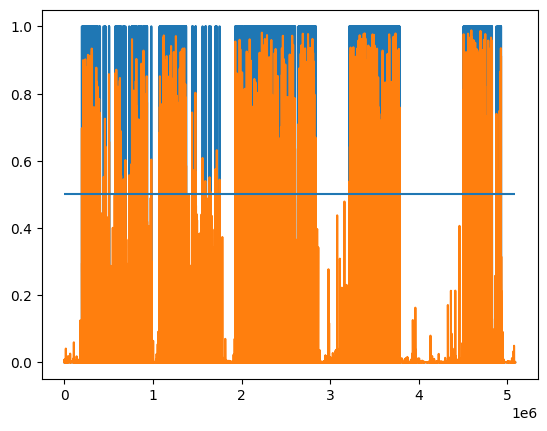

In [ ]:
plt.plot(rawLabels)
plt.plot(probabilities)
plt.hlines(thres_prediction,xmin=0,xmax=len(predicted_raw))
